In [60]:
import numpy                 # we're importing numpy 
import matplotlib.pyplot as plt
from matplotlib import animation
# %matplotlib inline

nx = 41
dx = 2 / (nx - 1)
nt = 20    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)

u = numpy.ones(nx)      #as before, we initialize u with every value equal to 1.
u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx) #initialize our placeholder array un, to hold the time-stepped solution
plt.plot(numpy.linspace(0, 2, nx), u);

<IPython.core.display.Javascript object>


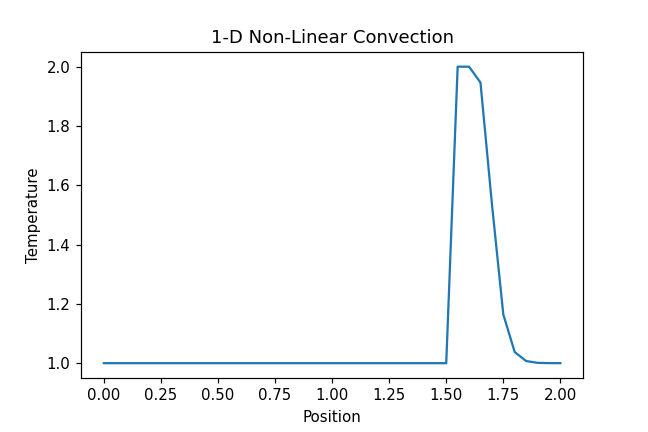

Text(0.5, 0, 'Position')

In [61]:
%matplotlib notebook
fig, ax = plt.subplots()

x = numpy.linspace(0, 2, nx)
line, = ax.plot(x,u)

def init():
    line.set_ydata([numpy.nan] * len(x))
    return line,

def animate(i):
    un = u.copy() 
    for i in range(1, nx): 
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    line.set_ydata(u)
    return line,
    
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=21, interval=300, blit=True)

plt.title("1-D Non-Linear Convection")
plt.ylabel("Temperature")
plt.xlabel("Position")